# Assignment 2: Plottings
Before running the project, you need in install pygal if you haven't already

```pip install pygal```

## Create a bar plot that shows distribution of german and british citizens in terms of age.

<IPython.core.display.Javascript object>


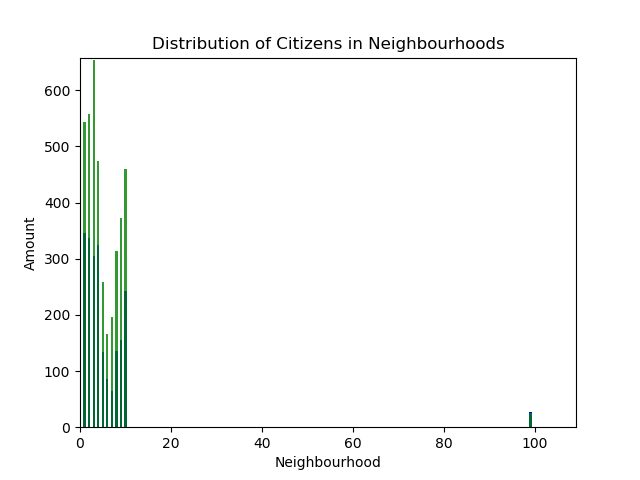

In [3]:
from STATISTICS import make_dict_from_csv
%matplotlib notebook
import matplotlib.pyplot as plt


kkdata = make_dict_from_csv()
neighbourhoods_in_2015_data = kkdata[2015].keys()
neighbourhoods = neighbourhoods_in_2015_data

def no_nationality_difference(code1=5130, code2=5180, anno=2015):
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata[anno][n].keys())

    no_code1_per_neighbourhood = {}
    no_code2_per_neighbourhood = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata[anno][n].keys():
                c_codes = set(kkdata[anno][n][age].keys())
                
                if code1 in c_codes:
                    no_code1_per_neighbourhood.setdefault(n, 0)
                    no_code1_per_neighbourhood[n] += kkdata[anno][n][age][code1]
                    
                if code2 in c_codes:
                    no_code2_per_neighbourhood.setdefault(n, 0)
                    no_code2_per_neighbourhood[n] += kkdata[anno][n][age][code2]
                    

                    
    return no_code1_per_neighbourhood, no_code2_per_neighbourhood # returning a comma separated set of elements creates a tuple

code1List, code2List = no_nationality_difference()






plt.bar(code1List.keys(), code1List.values(), width=0.5, linewidth=0, align='center', color="blue")
plt.ticklabel_format(useOffset=False)
plt.axis([0, max(code1List.keys()) + 10, 0, max(code2List.values()) + 5])
title = 'Distribution of Citizens in {}'.format("Neighbourhoods")
plt.title(title, fontsize=12)
plt.xlabel("Neighbourhood", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
#plt.subplots(squeeze=True)

plt.bar(code2List.keys(), code2List.values(), width=0.5, linewidth=0, align='center', color='green', alpha=0.8)
plt.show()

## How many French are there compared to Germans and how are they distributed over various neighbourhoods?

<IPython.core.display.Javascript object>


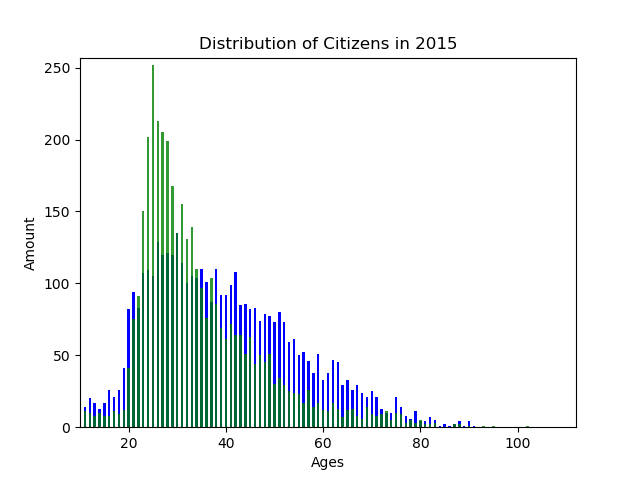

In [4]:
from STATISTICS import make_dict_from_csv
%matplotlib notebook
import matplotlib.pyplot as plt

kkdata = make_dict_from_csv()
neighbourhoods_in_2015_data = kkdata[2015].keys()
neighbourhoods = neighbourhoods_in_2015_data


def get_population_stat(code1=5170, code2=5180, anno=2015):
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata[anno][n].keys())

    no_code1_per_age = {}
    no_code2_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata[anno][n].keys():
                c_codes = set(kkdata[anno][n][age].keys())
                
                if code1 in c_codes:
                    no_code1_per_age.setdefault(age, 0)
                    no_code1_per_age[age] += kkdata[anno][n][age][code1]
                    
                if code2 in c_codes:
                    no_code2_per_age.setdefault(age, 0)
                    no_code2_per_age[age] += kkdata[anno][n][age][code2]
                    

                    
    return no_code1_per_age, no_code2_per_age # returning a comma separated set of elements creates a tuple

brits_per_age, germans_per_age = get_population_stat() #returned tuple is deconstructed into 2 variables

def add_keys_from_one_another(one, other): #harmonize: ensure both data collections have the same keys = x-axis
    for k, v in one.items():
        if not k in other.keys():
            other[k] = 0

add_keys_from_one_another(brits_per_age, germans_per_age)
add_keys_from_one_another(germans_per_age, brits_per_age)

ages_brit = list(brits_per_age.keys())
no_brit_citizens = list(brits_per_age.values()) 
ages_germans = list(germans_per_age.keys())
no_german_citizens = list(germans_per_age.values())


germanSum = sum(no_german_citizens)

plt.bar(ages_brit, no_brit_citizens, width=0.5, linewidth=0, align='center', color="blue")
plt.ticklabel_format(useOffset=False)
plt.axis([10, max(ages_brit) + 10, 0, max(no_german_citizens) + 5])
title = 'Distribution of Citizens in {}'.format(2015)
plt.title(title, fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.bar(ages_germans, no_german_citizens, width=0.5, linewidth=0, align='center', color='green', alpha=0.8)
plt.show()

## Create a pie chart showing the 5 major citizen groups of age between 20-65

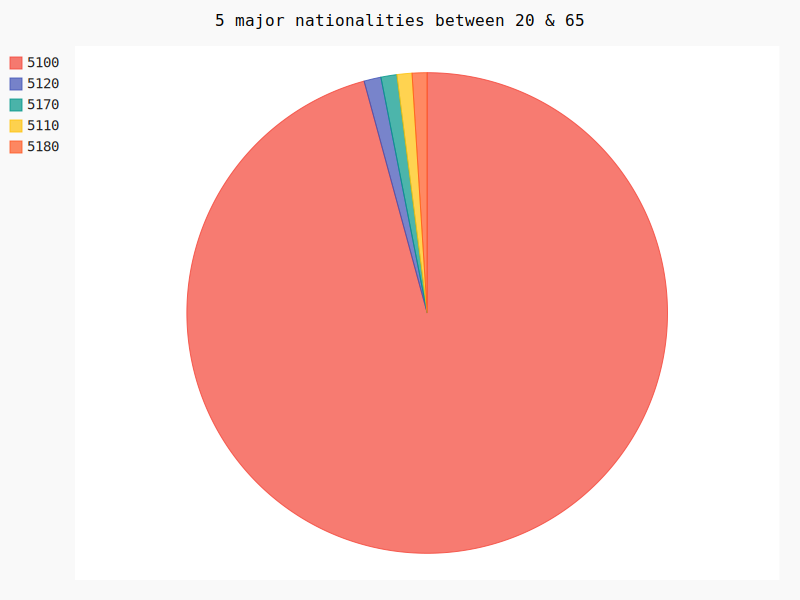

In [5]:
from STATISTICS import make_dict_from_csv
%matplotlib notebook
import matplotlib.pyplot as plt
import pygal
from IPython.core.display import SVG

kkdata = make_dict_from_csv()
neighbourhoods_in_2015_data = kkdata[2015].keys()
neighbourhoods = neighbourhoods_in_2015_data

def get_citizens_between_between_20_65(code1=5130, code2=5180, anno=2015):
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata[anno][n].keys())

    people_by_nationality_20_to_65 = {}

    for n in neighbourhoods:
        for age in age_range:
            if 20 <= age <= 65:
                c_codes = set(kkdata[anno][n][age].keys())           
                for code in c_codes:
                    people_by_nationality_20_to_65.setdefault(code, 0)
                    people_by_nationality_20_to_65[code] += kkdata[anno][n][age][code]
                    
                    

                    
    return people_by_nationality_20_to_65

test = get_citizens_between_between_20_65()
top_5_list = sorted(test.items(), key=lambda x: x[1], reverse=True)
top_5_list = dict(top_5_list[:5])

pie_chart = pygal.Pie() # create a pie chart
pie_chart.title = '5 major nationalities between 20 & 65'
for key, value in top_5_list.items():
    pie_chart.add(str(key), value)
    

pie_chart.render_to_file('./pie_chart.svg')
SVG(filename='pie_chart.svg')